In [106]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.lib.stride_tricks import as_strided

from sklearn import preprocessing

from qiskit import QuantumCircuit, execute
from qiskit_machine_learning.circuit.library import RawFeatureVector
from qiskit import transpile
from qiskit_aer import AerSimulator

from scipy.fft import fft2

In [68]:
data = np.load("data/images.npy")
labels = np.load("data/labels.npy")

max_num_qubits = 16

In [69]:
lin_data = [dd.reshape(-1) for dd in data]
norm_lin_data = preprocessing.normalize(lin_data)
norm_data = np.array( [nd.reshape(28, 28) for nd in norm_lin_data] )

In [70]:
def pool2d(A, kernel_size, stride, padding=0, pool_mode='max'):
    '''
    2D Pooling

    Parameters:
        A: input 2D array
        kernel_size: int, the size of the window over which we take pool
        stride: int, the stride of the window
        padding: int, implicit zero paddings on both sides of the input
        pool_mode: string, 'max' or 'avg'
    '''
    # Padding
    A = np.pad(A, padding, mode='constant')

    # Window view of A
    output_shape = ((A.shape[0] - kernel_size) // stride + 1,
                    (A.shape[1] - kernel_size) // stride + 1)

    shape_w = (output_shape[0], output_shape[1], kernel_size, kernel_size)
    strides_w = (stride*A.strides[0], stride*A.strides[1], A.strides[0], A.strides[1])

    A_w = as_strided(A, shape_w, strides_w)

    # Return the result of pooling
    if pool_mode == 'max':
        return A_w.max(axis=(2, 3))
    elif pool_mode == 'avg':
        return A_w.mean(axis=(2, 3))


def pool2d(A, kernel_size, stride, padding=0, pool_mode='max'):
    '''
    2D Pooling

    Parameters:
        A: input 2D array
        kernel_size: int, the size of the window over which we take pool
        stride: int, the stride of the window
        padding: int, implicit zero paddings on both sides of the input
        pool_mode: string, 'max' or 'avg'
    '''
    # Padding
    A = np.pad(A, padding, mode='constant')

    # Window view of A
    output_shape = ((A.shape[0] - kernel_size) // stride + 1,
                    (A.shape[1] - kernel_size) // stride + 1)

    shape_w = (output_shape[0], output_shape[1], kernel_size, kernel_size)
    strides_w = (stride*A.strides[0], stride*A.strides[1], A.strides[0], A.strides[1])

    A_w = as_strided(A, shape_w, strides_w)

    # Return the result of pooling
    if pool_mode == 'max':
        return A_w.max(axis=(2, 3))
    elif pool_mode == 'avg':
        return A_w.mean(axis=(2, 3))



In [177]:
img = data[0]*255

In [190]:
for ii in (pool2d(img, 2, 2)*255).T:
    for jj in ii:
        print(int(jj))


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
95
179
176
163
1
0
0
0
0
0
0
0
35
172
173
180
175
212
4
1
1
2
2
2
2
3
185
171
161
180
212
186
139
90
84
99
99
99
109
126
200
151
150
175
202
210
160
158
164
169
170
169
169
177
200
155
174
129
142
190
183
168
165
162
162
165
166
178
237
149
172
179
181
208
118
186
165
164
164
165
172
185
255
152
175
213
145
212
144
186
164
168
168
171
172
175
212
152
170
133
210
169
180
162
162
162
162
164
165
176
201
155
150
174
181
183
163
165
165
163
164
163
166
173
191
171
156
177
229
208
136
132
161
161
174
176
173
186
10
169
179
185
198
215
2
1
1
2
2
2
3
2
0
0
106
179
179
174
2
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


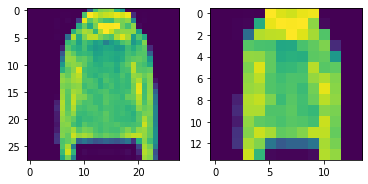

In [98]:
idx = -1

fig, ax = plt.subplots(1, 2)


ax[0].imshow( data[idx] )

ax[1].imshow( pool2d(data[idx], 2, 2)  )

plt.show()

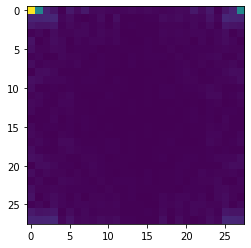

In [56]:
plt.imshow(np.abs(fft2(norm_data[idx]) ) )

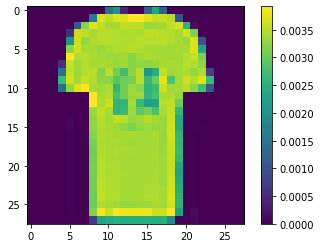

In [105]:
plt.imshow(data[4])
plt.colorbar()

In [60]:
2**16

65536

In [170]:
num_qub = 6
qc = RawFeatureVector(2**num_qub)
new_img = pool2d(norm_data[0], 2, 2)[7:, 7:].reshape(-1)

qc = qc.assign_parameters(  np.pad(new_img, (0, 2**num_qub-len(new_img) )) )
qc = transpile(qc, basis_gates=["cx", "rx", "ry", "ry"])

In [184]:
0.999**(224 )

0.79922555636713

In [145]:
idx = -6
print(labels[idx])
image = data[idx]
qc = QuantumCircuit(14)

for ii in range(14):
    qc.ry( image[ii, ii], ii)

for ii in range(14):
    for jj in range(ii+1, 14):
        qc.cry( image[ii, ii], ii, jj)

for ii in range(14):
    qc.h(ii)

qc.save_state()

False


In [146]:
res = execute(qc, AerSimulator(method="statevector"))
sv = res.result().data()["statevector"]

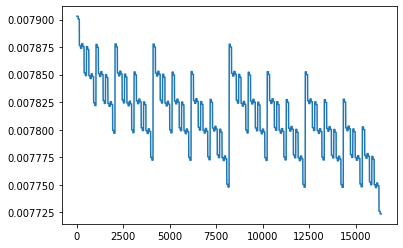

In [147]:
plt.plot( np.abs( sv)[np.abs( sv)>1e-6] )

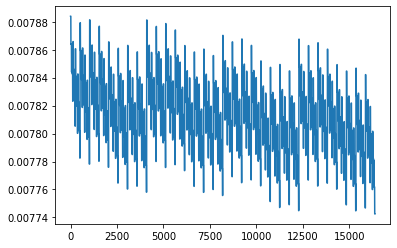

In [132]:
plt.plot( np.abs( sv)[np.abs( sv)>1e-6] )

#plt.xscale("log")

In [153]:
np.log2(14*14)

7.614709844115208

In [156]:
import numpy as np
from qiskit import QuantumRegister, ClassicalRegister

# Initialize the quantum circuit for the image
# Pixel position
idx = QuantumRegister(2, 'idx')
# grayscale pixel intensity value
intensity = QuantumRegister(8,'intensity')
# classical register
cr = ClassicalRegister(10, 'cr')

# create the quantum circuit for the image
qc_image = QuantumCircuit(intensity, idx, cr)

# set the total number of qubits
num_qubits = qc_image.num_qubits

qc_image.draw()

128

In [ ]:
np.loadtxt("qpixlpp/examples/output.pgm", skiprows=)